<span style="font-size: 40px; color: red">Predicting House Prices using Regression Models</span>
#### Objective:
* The goal of this assignment is to apply the concepts learned about regression models to predict house prices using a given dataset. You will use various regression models, evaluate their performance, and tune their hyperparameters.

#### Dataset:
* Use the Boston Housing dataset, which is available in scikit-learn's datasets module.

#### Instructions:
1. Import necessary libraries and load the dataset.

2. Perform exploratory data analysis and preprocessing (e.g., check for missing values, visualize the data, etc.).

3. Split the dataset into training and testing sets.

4. Implement the following regression models:
   * Simple Linear Regression (choose an appropriate feature)
   * Multiple Linear Regression
   * Polynomial Regression
   * Ridge Regression
   * Lasso Regression
   * Support Vector Regression
   * Decision Tree Regression
   * Random Forest Regression
5. Evaluate the performance of each model using appropriate evaluation metrics, such as MAE, MSE, RMSE, R-squared, or Adjusted R-squared.

6. Perform cross-validation and hyperparameter tuning for the models that require it, using grid search or randomized search.

7. Compare the performance of the different models and discuss your findings.

8. Choose the best model based on the evaluation metrics and provide insights into its performance and predictions.

#### Submission:
* Prepare a report or Jupyter Notebook that includes your code, visualizations, results, and explanations for each step. The report should be well-organized, clear, and concise.

<span style="font-size: 30px; color: green">Import Libraries</span>

In [23]:
import pandas as pd
import numpy as np
# import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

<span style="font-size: 30px; color: green">Load Dataset</span>

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### Load the Dataframe for data and target

In [3]:
# Rename the columns
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Load the dataframe for Data
df = pd.DataFrame(data, columns=columns)

# Load the target
df["Target"] = target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Save the new data
df.to_csv("boston.csv", index=False)

<span style="font-size: 30px; color: green">Reload Dataset</span>

In [5]:
boston_data = pd.read_csv("boston.csv")
boston_data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<span style="font-size: 30px; color: green">Exploratory Data Analysis and Preprocessing</span>

In [6]:
# Check for missing values
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

<span style="font-size: 20px; color: green">Data Visualization</span>

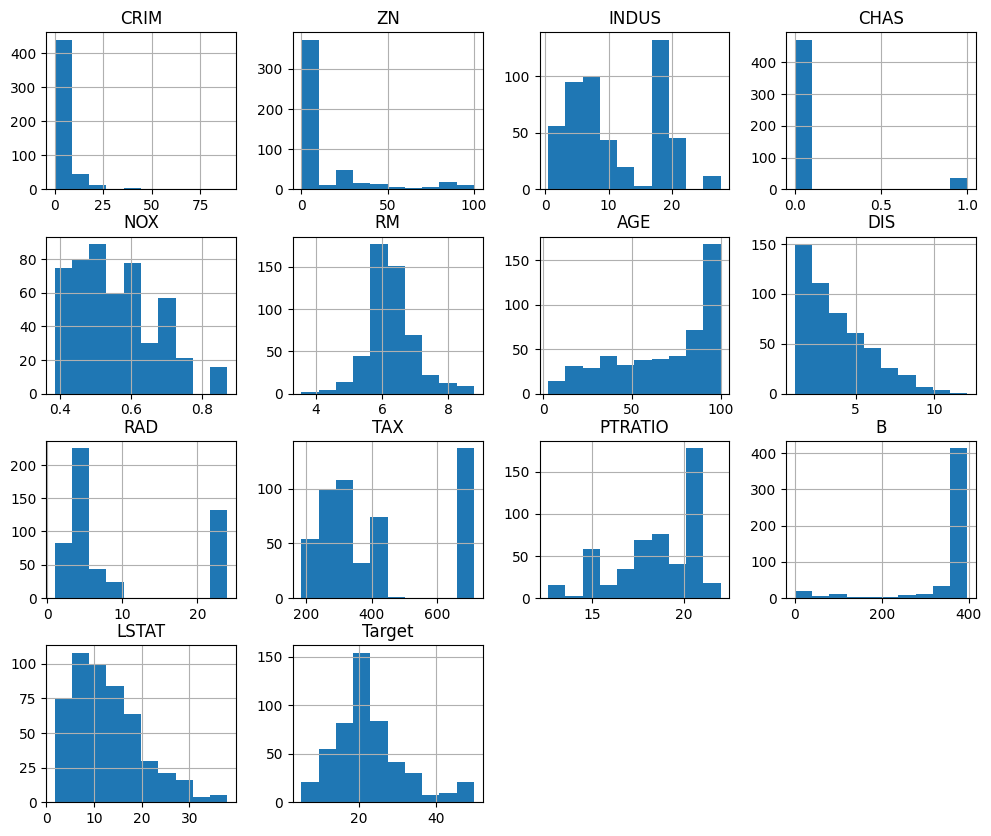

In [7]:
boston_data.hist(figsize=(12, 10))
plt.show()

<span style="font-size: 30px; color: green">Data Splitting</span>

In [8]:
X = boston_data.drop("Target", axis=1)
y = boston_data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-size: 30px; color: green">Implementing regression models:</span>

<span style="font-size: 20px; color: blue">Simple Linear Regression</span>

In [22]:
# linear regresion model(Single independent variable)
slr_model = LinearRegression()

# reshape the array to use a single feature form X_train and X_test
X_train_ind_var = X_train["RM"].values.reshape(-1, 1)
X_test_ind_var = X_test["RM"].values.reshape(-1, 1)

# fit the model on training data
slr_model.fit(X_train_ind_var, y_train)

# predict the model on testing data
slr_y_pred = slr_model.predict(X_test_ind_var)

# evaluate the model
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, slr_y_pred)}")# closer to 0 means perfect prediction
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, slr_y_pred)}")# Closer to 0 means perfect prediction of the model
print(f"R2_Score(R-Squared Score): {r2_score(y_test, slr_y_pred)}")# when score is 1, it indicates that the model's predictions perfectly match the actual values in the dataset

Mean Squared Error(MSE): 46.144775347317264
Mean Absolute Error(MAE): 4.478335832064149
R2_Score(R-Squared Score): 0.3707569232254778


<span style="font-size: 20px; color: blue">Multiple Linear Regression</span>

In [24]:
# Linear regression model(multile independent variable)
mlr_model = LinearRegression()
# fit the model on training data
mlr_model.fit(X_train, y_train)
# Predict the model on testing data
mlr_y_pred = mlr_model.predict(X_test)

# model evaluation
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, mlr_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, mlr_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, mlr_y_pred)}")

Mean Squared Error(MSE): 24.29111947497331
Mean Absolute Error(MAE): 3.1890919658878247
R2_Score(R-Squared Score): 0.6687594935356348


<span style="font-size: 20px; color: blue">Polynomial Regression</span>

In [26]:
# how many times the variable is multiplied by itself

# Ploynormial feature object with desired degree
poly_feature = PolynomialFeatures(degree=2)

# Transform input features to polynormial features
X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

# Linear regression model
lr_model = LinearRegression()
# fit the model on training data
lr_model.fit(X_train_poly, y_train)
# predict the model on testing data
poly_y_pred = lr_model.predict(X_test)

# model evaluation
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, poly_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, poly_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, poly_y_pred)}")

/home/jane/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but LinearRegression is expecting 105 features as input.

In [ ]:
# Implement Polynomial Regression (use the same Linear Regression model with transformed features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
poly_lr_metrics = evaluate_model(poly_lr, X_test_poly, y_test)


<span style="font-size: 30px; color: green">Import Libraries</span>